In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
df=pd.read_excel('HR_comma_sep.xlsx')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,5089
14995,0.37,0.48,2,160,3,0,1,0,support,low,4001
14996,0.37,0.53,2,143,3,0,1,0,support,low,12842
14997,0.11,0.96,6,280,4,0,1,0,support,low,8849


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


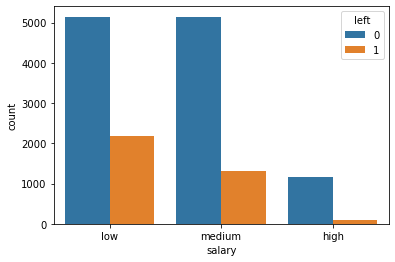

In [5]:
# TASK 1a
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = df["salary"], hue = df["left"])
plt.show()

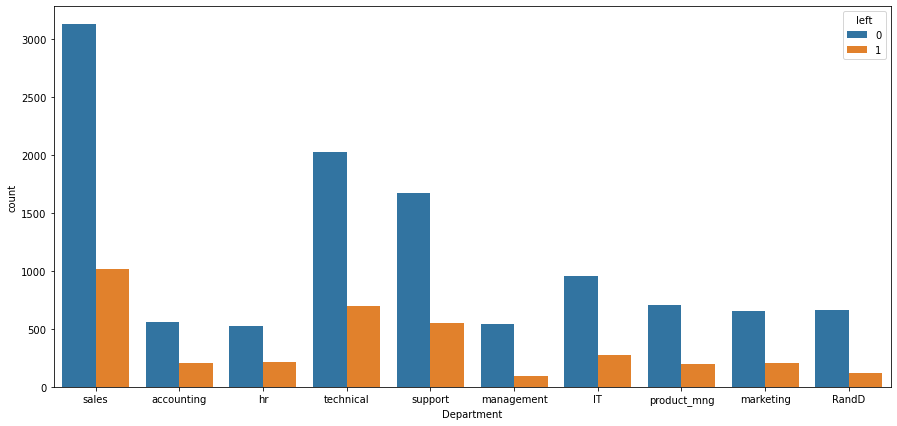

In [7]:
# TASK 1b
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = df["Department"], hue = df["left"])
plt.show()

In [8]:
# TASK 2a
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num


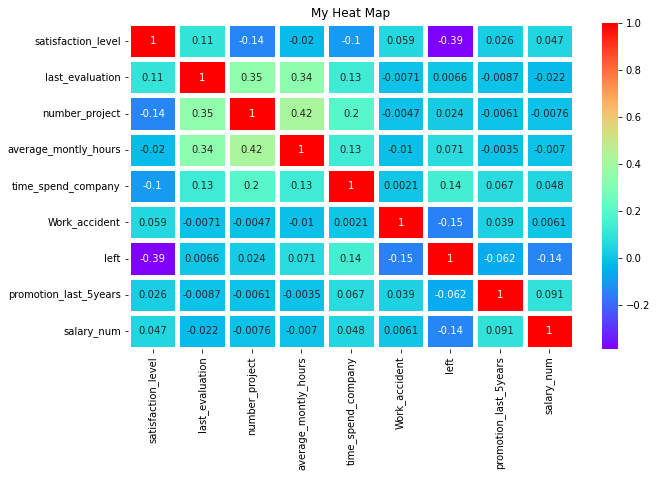

In [9]:
# TASK 2b
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

In [11]:
# TASK 2c
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(df.salary)
print(encoder.classes_)
df.salary = encoder.transform(df.salary)

['high' 'low' 'medium']


In [12]:
encoder1 = preprocessing.LabelEncoder()

encoder1.fit(df.Department)
print(encoder1.classes_)
df.Department = encoder1.transform(df.Department)

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


The 'left' column is having maximum correlation with satisfaction level but we cannot exclude it from our analysis as the correlation in not that high.

In [13]:
# TASK 3a
HR_train, HR_test = train_test_split(df,train_size = 0.75)

print('Size of training dataset: ', HR_train.shape)
print('Size of test dataset: ', HR_test.shape)

Size of training dataset:  (11249, 11)
Size of test dataset:  (3750, 11)


In [14]:
X_train = HR_train.drop(columns='left', axis =1)
Y_train = HR_train['left']
X_test = HR_test.drop(columns='left', axis =1)
Y_test = HR_test['left']
X_train.shape, Y_train.shape, X_test.shape

((11249, 10), (11249,), (3750, 10))

In [25]:
# TASK 3b
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)
y_pred1= clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(Y_train, y_pred1))

Accuracy: 0.9520846297448662


In [19]:
# TASK 3c
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9541333333333334


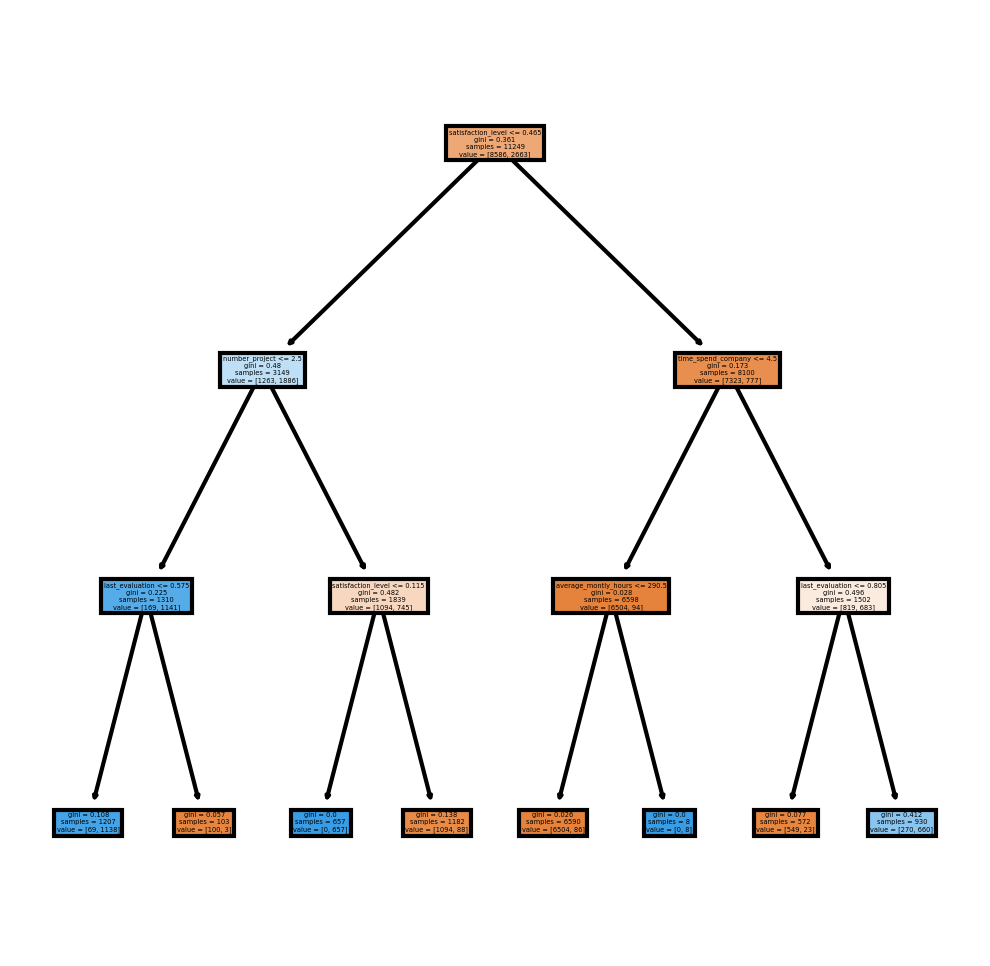

In [27]:
from sklearn import tree
feature_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'salary_num']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = feature_cols, 
           filled = True);

In [21]:
# TASK 4a
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[2743,   99],
       [  73,  835]], dtype=int64)

In [22]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, y_pred))
print('recall:', recall_score(Y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(Y_test, y_pred, average='weighted'))
print('precision:', precision_score(Y_test, y_pred))

accuracy: 0.9541333333333334
recall: 0.9541333333333334
f1-score: 0.9543516547438524
precision: 0.8940042826552462


In [23]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.942


In [45]:
# TASK 5
df1=df.drop(['salary','left'], axis=1)
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_num
0,0.38,0.53,2,157,3,0,0,7,4649
1,0.80,0.86,5,262,6,0,0,7,34126
2,0.11,0.88,7,272,4,0,0,7,40522
3,0.72,0.87,5,223,5,0,0,7,6916
4,0.37,0.52,2,159,3,0,0,7,10928
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,5089
14995,0.37,0.48,2,160,3,0,0,8,4001
14996,0.37,0.53,2,143,3,0,0,8,12842
14997,0.11,0.96,6,280,4,0,0,8,8849


In [46]:
dep_dummies = pd.get_dummies(df1.Department, prefix="Department")
df1 = pd.concat([df1,dep_dummies],axis='columns')
df1.drop('Department',axis='columns',inplace=True)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_num,Department_0,Department_1,Department_2,Department_3,Department_4,Department_5,Department_6,Department_7,Department_8,Department_9
0,0.38,0.53,2,157,3,0,0,4649,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,34126,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,40522,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,6916,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,10928,0,0,0,0,0,0,0,1,0,0


In [47]:
df_train, df_test = train_test_split(df1, train_size=0.7, random_state=2)
print('Size of training dataset: ', df_train.shape)
print('Size of test dataset: ', df_test.shape)

Size of training dataset:  (10499, 18)
Size of test dataset:  (4500, 18)


In [48]:
X_train1 = df_train.drop(columns='salary_num', axis =1)
y_train1 = df_train['salary_num']
X_test1 = df_test.drop(columns='salary_num', axis =1)
y_test1 = df_test['salary_num']
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((10499, 17), (10499,), (4500, 17), (4500,))

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train1,y_train1)
print("Score: ",(dtm.score(X_test1,y_test1)))

Score:  0.057684667289447544


In [50]:
y_pred2 = dtm.predict(X_test1)
y_pred2

array([31228.25685106, 24519.13179449, 31228.25685106, ...,
       31228.25685106, 24519.13179449, 31228.25685106])

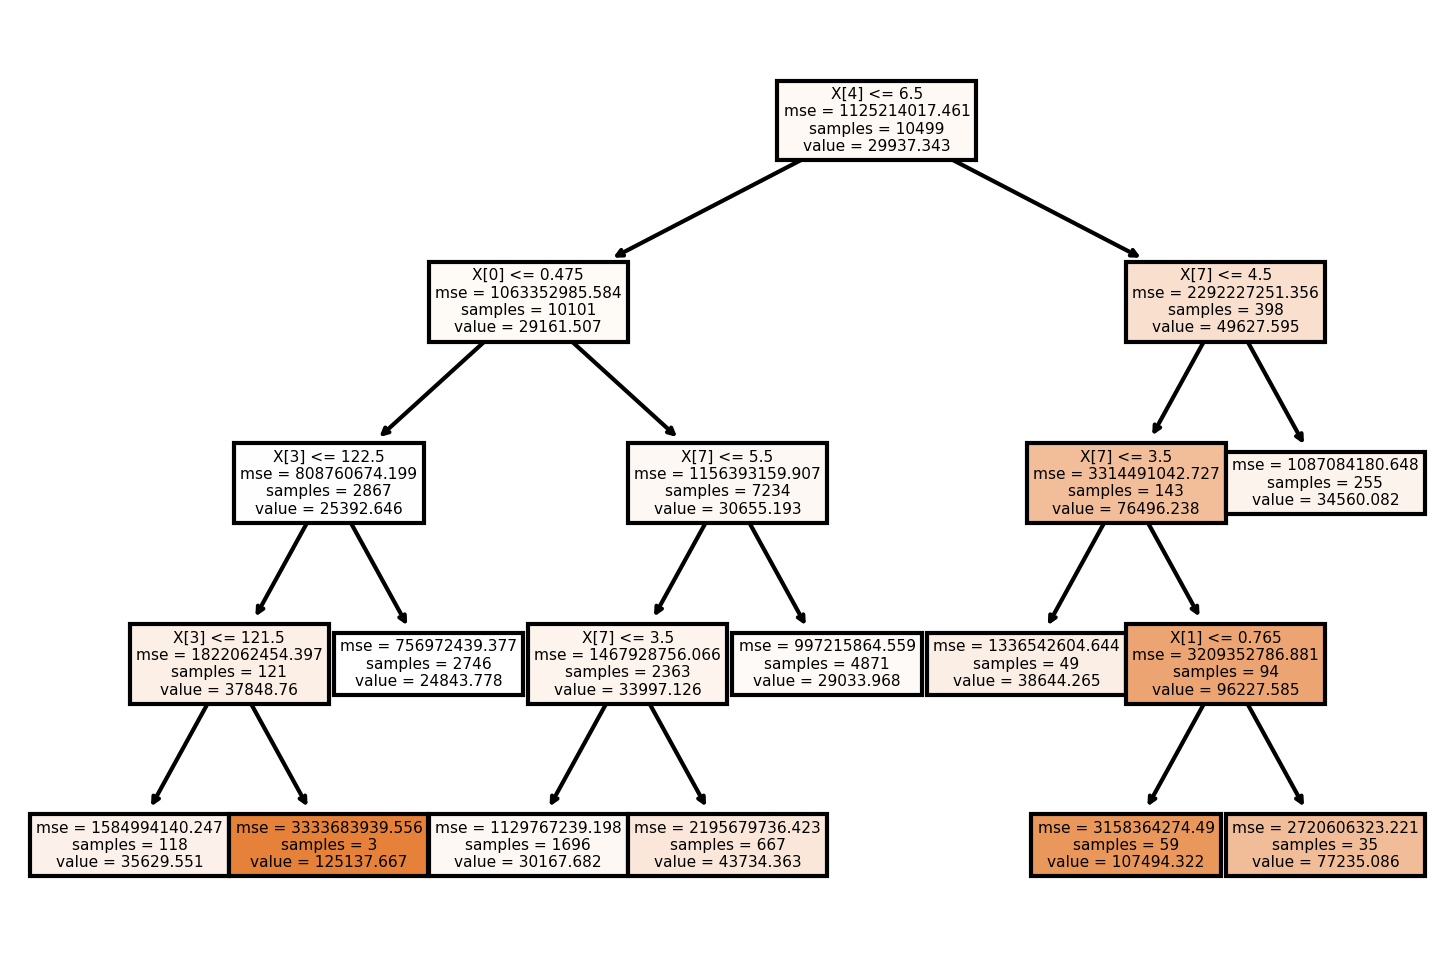

In [38]:
fig, ax= plt.subplots(dpi=300)
tree.plot_tree(dtm, filled=True)
plt.show()